In [1]:
import VASPPlotter
import VASPInputHandler
import numpy as np
import os
import subprocess

In [ ]:
# DOS Plot for Full Na to Full Mg.
a = VASPPlotter.Plotter("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/CrTiO4")
a.dos(what_to_plot={'Cr' : {'spins' : ['summed'], 'orbitals' : ['all']}, 'Ti' :
                    
                    {'spins' : ['summed'], 'orbitals' : ['all']}, 'O' : {'spins' : ['summed'], 'orbitals' : ['all']}},
      colors_and_labels = {'Cr-summed-all' : {'color' : 'black', 'label' : 'Cr'}, 'Ti-summed-all' : {'color' : 'blue', 'label' : 'Ti'}, 'O-summed-all' : {'color' : 'red', 'label' : 'O'}},
      xticks=(True, np.arange(0, 0.100, 0.05)), yticks=(True, np.arange(-3, 3.01, 1)), doscar="DOSCAR", xlim=(0, 0.1), ylim=(-3, 3), smearing = 0.1, show = True, spgp='pnma')

In [ ]:
a = VASPPlotter.Plotter("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/")
a.avplotter('fd3m', 'Mg', 'Na', calstructure = {'Co0.5Sn1.5O4': {'color': 'royalblue'}, 'CrSnO4': {'color': 'darkorange'}, 'CrTiO4': {'color': 'forestgreen'}, 
                                 'Fe0.5Ti1.5O4': {'color': 'dimgray'}, 'MnSnO4': {'color': 'firebrick'}, 'Ni0.5Sn1.5O4': {'color': 'darkorchid'}})

In [82]:
# Designate new calculation folder and take desire structure from MP database. Change supercell as you want.
# Use NaMn2O4 for pnma basic structure, MgAl2O4 for fd3m basic structure
a = VASPInputHandler.VASPSetUp("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/Mg0.5MnTiO4_fd3m_first")
a.structure_from_mp("MgAl2O4", "Fd-3m", True)
a.make_supercell([2,2,1])

'/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/Mg0.5MnTiO4_fd3m_first/POSCAR'

In [32]:
# Designate new calculation folder with MP ID and get desired structure from MP database.
a = VASPInputHandler.VASPSetUp("/global/cscratch1/sd/yychoi/JCESR/MgSCN/test/mp-1223509_first")
a.structure_from_id()
a.els_to_amts()

{'K': 2, 'C': 2, 'S': 2, 'N': 2}

In [83]:
# Change atoms as you want and find most electrostatically stable structure.
a.change_atoms({'Mg' : 'Mg2+', 'Al' : {'Mn3+' : 0.5, 'Ti4+' : 0.5}, 'O' : 'O2-'}, 100)

'/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/Mg0.5MnTiO4_fd3m_first/POSCAR'

In [84]:
# Change atoms one more time. Doing this twice is assuming rapid ion exchage in the process. And perturb poscar
a.change_atoms({'Mg' : {'Mg2+' : 0.5}, 'Mn' : 'Mn3+', 'Ti' : 'Ti4+', 'O' : 'O2-'}, 100)
a.perturb_poscar(0.01)

'/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/Mg0.5MnTiO4_fd3m_first/POSCAR'

In [85]:
# Generate Kpoint density with 1000/atom, INCAR, POTCAR, script
a.kpoints(1000)
a.incar(geometry_opt=True, dos=True, MP=True, write_file=True)
a.potcar(MP=True, machine='cori')
a.copy_script(time='12:00:00')

In [3]:
a = VASPInputHandler.VASPBasicAnalysis('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/Co0.5Sn1.5O4/MgCo0.5Sn1.5O4_fd3m_first')
a.second_run(lobster=True)

calculation is not convered but keep going


In [7]:
b = VASPInputHandler.VASPBasicAnalysis('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/MnTiO4_pnma_second/')
b.ehullmp()

0.057252898333333135

In [5]:
import re
i = '/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/MnTiO4_pnma_second'
re.findall('[A-Z][^A-Z]*', i.split('/')[-1].split('_')[0])[0]

'Mn'

In [9]:
b = VASPPlotter.Plotter('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/')

Na
('0.0', '0.5', '1.0') (94.73842604166549, 67.98417442307691, 7.787046428575195)
('0.0', '0.5', '1.0') (75.26136791666536, 67.42847538461305, 36.77584785714316)
('0.0', '0.5', '1.0') (89.12311249999937, 92.09569538461615, 26.62558500000145)
('0.0', '0.5', '1.0') (84.40065125000018, 74.9680671153854, 31.44355255951581)
('0.0', '0.5', '1.0') (53.62011166666747, 52.17320076923215, 3.3702091071416973)
Mg
('0.0', '0.5', '1.0') (94.73842604166549, 15.435887499998927, -79.72175749999798)
('0.0', '0.5', '1.0') (75.26136791666536, 10.084479807691338, -66.88541125000214)
('0.0', '0.5', '1.0') (89.12311249999937, 9.935347692307417, -97.37836178571337)
('0.0', '0.5', '1.0') (84.40065125000018, -14.685623076921672, -94.28348196428615)
('0.0', '0.5', '1.0') (53.62011166666747, 21.001130192307656, -93.35193428571299)


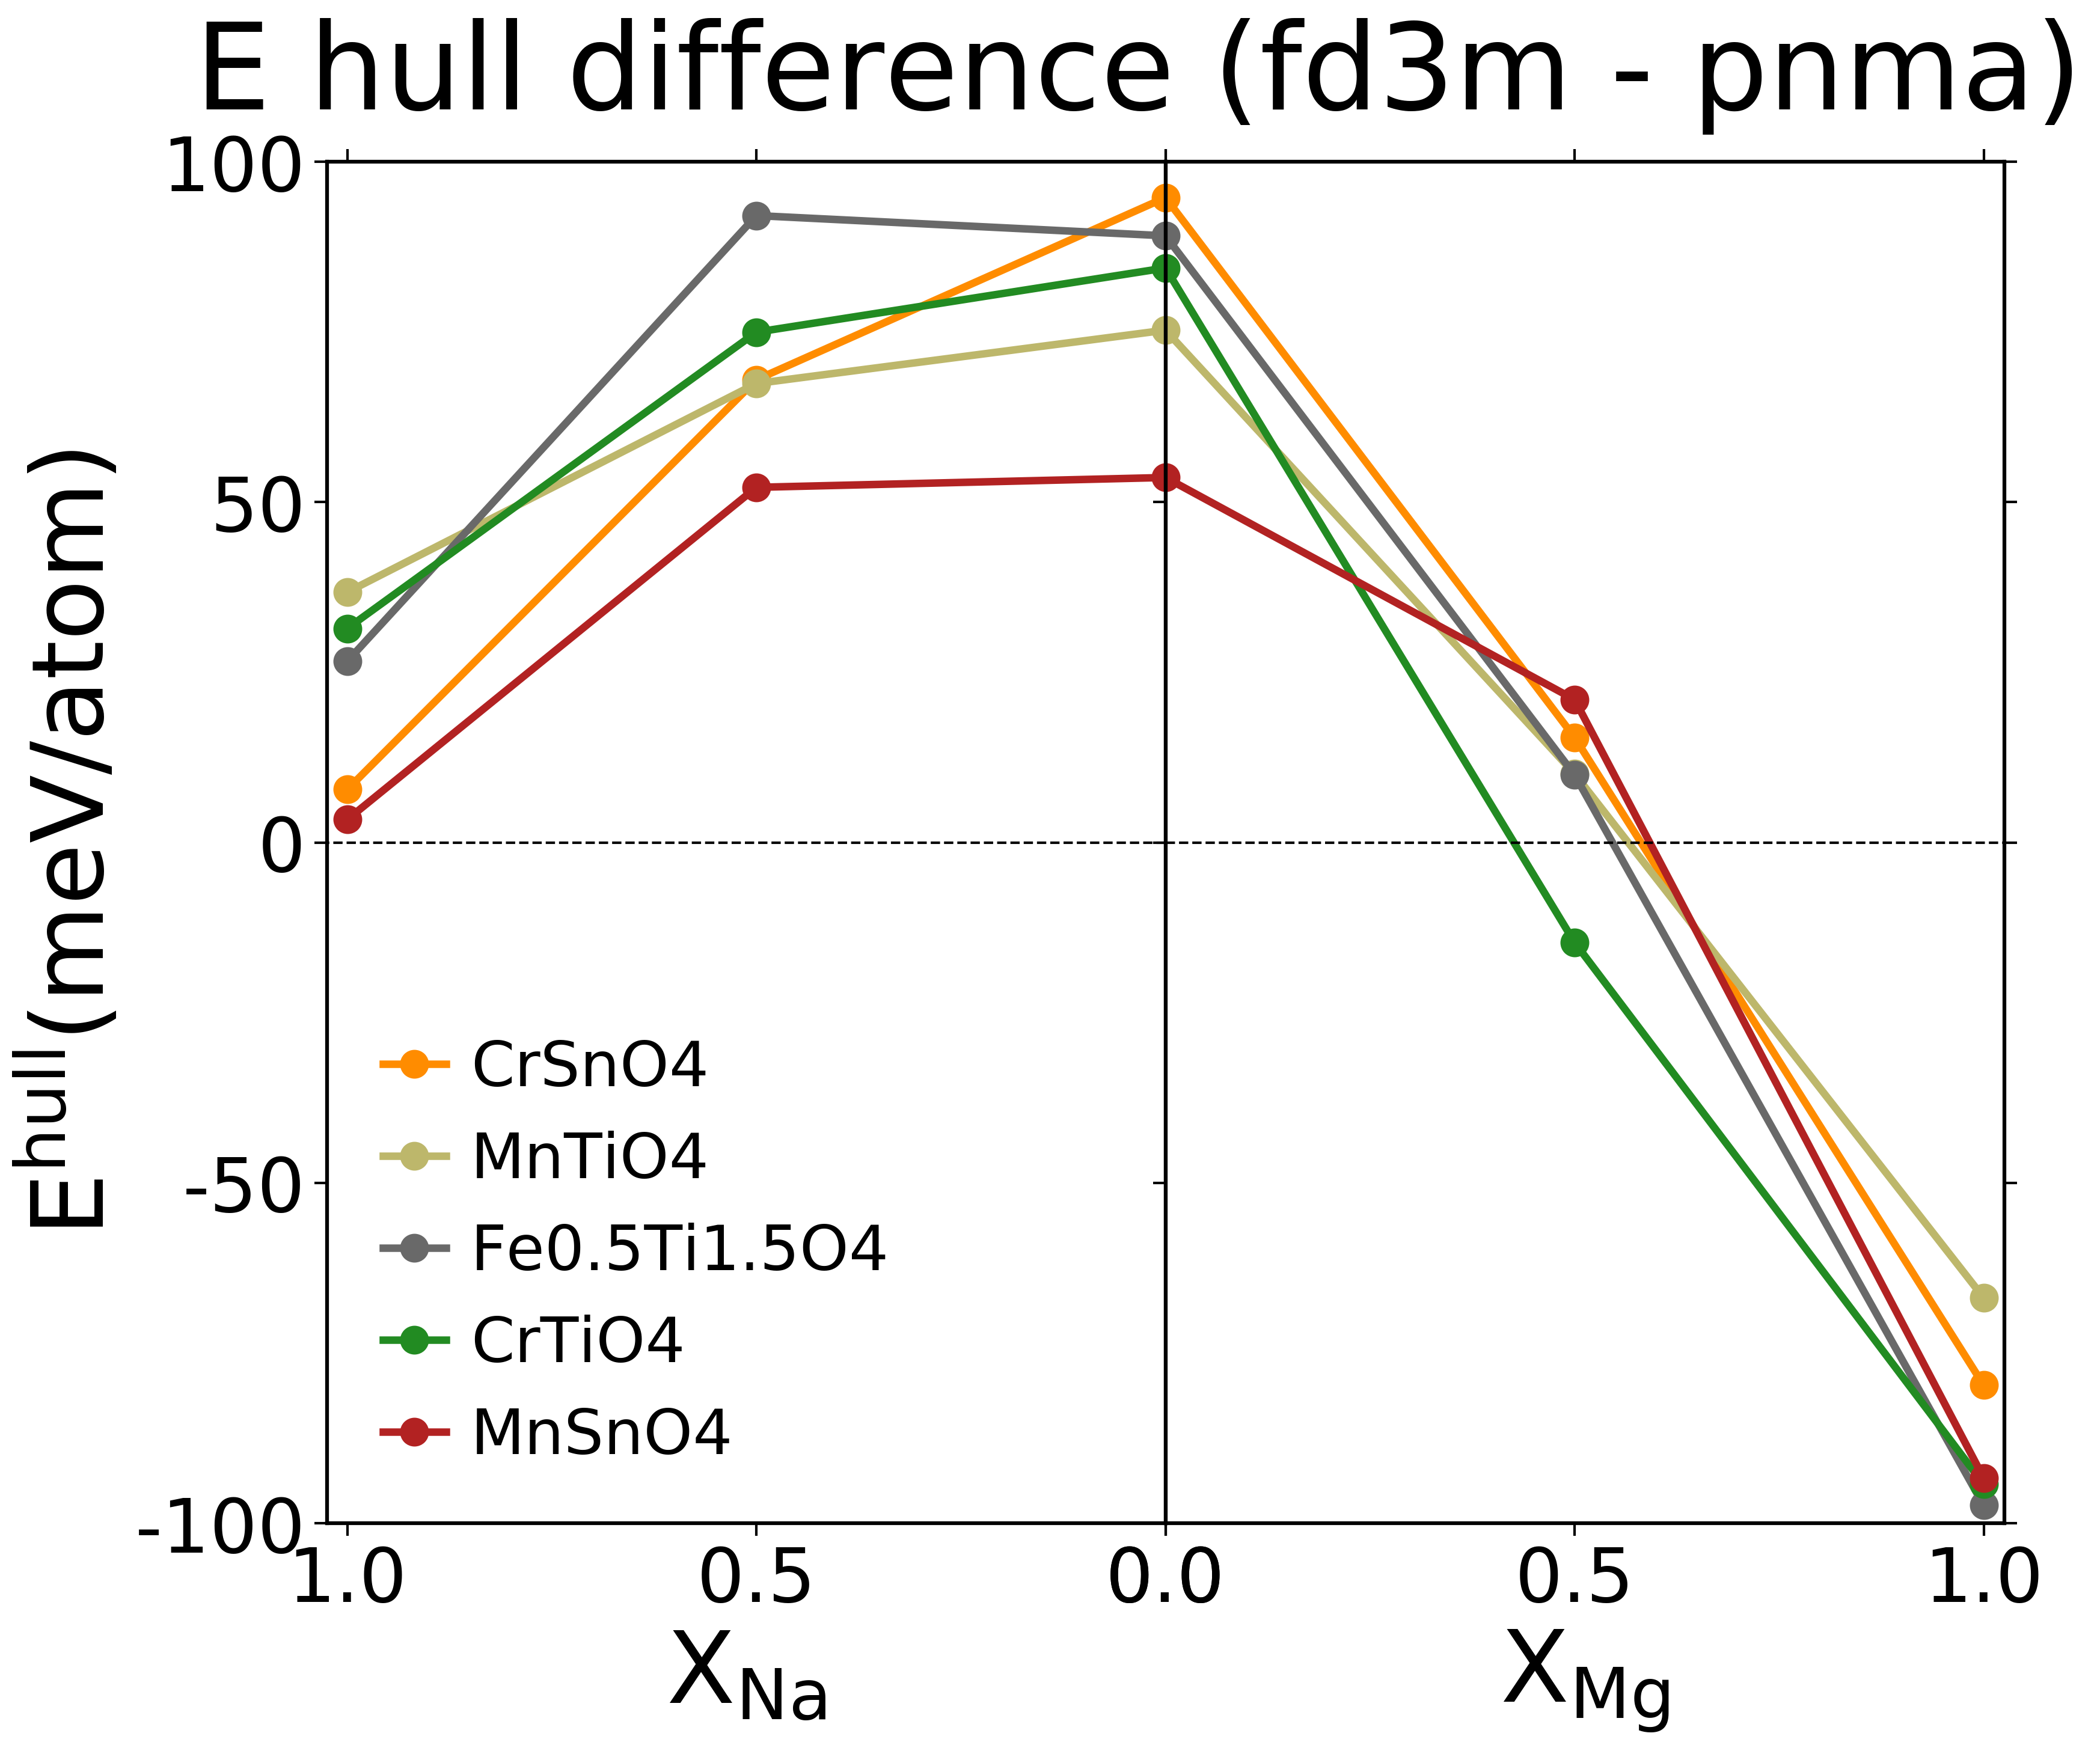

{'Na': {'CrSnO4': {'0.0': 94.73842604166549,
   '0.5': 67.98417442307691,
   '1.0': 7.787046428575195},
  'MnTiO4': {'0.0': 75.26136791666536,
   '0.5': 67.42847538461305,
   '1.0': 36.77584785714316},
  'Fe0.5Ti1.5O4': {'0.0': 89.12311249999937,
   '0.5': 92.09569538461615,
   '1.0': 26.62558500000145},
  'CrTiO4': {'0.0': 84.40065125000018,
   '0.5': 74.9680671153854,
   '1.0': 31.44355255951581},
  'MnSnO4': {'0.0': 53.62011166666747,
   '0.5': 52.17320076923215,
   '1.0': 3.3702091071416973}},
 'Mg': {'CrSnO4': {'0.0': 94.73842604166549,
   '0.5': 15.435887499998927,
   '1.0': -79.72175749999798},
  'MnTiO4': {'0.0': 75.26136791666536,
   '0.5': 10.084479807691338,
   '1.0': -66.88541125000214},
  'Fe0.5Ti1.5O4': {'0.0': 89.12311249999937,
   '0.5': 9.935347692307417,
   '1.0': -97.37836178571337},
  'CrTiO4': {'0.0': 84.40065125000018,
   '0.5': -14.685623076921672,
   '1.0': -94.28348196428615},
  'MnSnO4': {'0.0': 53.62011166666747,
   '0.5': 21.001130192307656,
   '1.0': -93.35

In [11]:
b.ehullplotter('fd3m', ionlist = ['Na', 'Mg', 'Li'], ylim=[-100, 100], yticks=(True, np.arange(-100, 101, 50)), remake = False)

In [ ]:
# For generating Secondrun file under MgPostSpinels dictionary
caldir = []
structurelist = [x[0] for x in os.walk('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels')]
for path in structurelist:
    if path.split('/')[-2] == 'MgPostSpinels' and path.split('/')[-1][-1] == '4':
        caldir.append(path)
        
pathlist = []
for dirs in caldir:
    structurelist = [x[0] for x in os.walk(dirs)]
    for path in structurelist:
        if path.split('/')[-1].split('_')[-1] == 'first' and path.split('/')[-1].split('_')[-2] == 'fd3m':
            a = VASPInputHandler.VASPBasicAnalysis(path)
            a.second_run()
            print(path)
        elif path.split('/')[-1].split('_')[-1] == 'second' and path.split('/')[-1].split('_')[-2] == 'fd3m':
            pathlist.append(path)

In [ ]:
# For submit Secondrun script under MgPostSpinels dictionary
for i, j in enumerate(pathlist):
    # subprocess.call(["ls -alt"], shell=True, cwd=j)
    subprocess.call(["sbatch script"], shell=True, cwd=j)  # for python 2
    print(j)
    print(str(i) + "th job is launched")

In [ ]:
# For find specific file under MgPostSpinels - specific structure dictionary
caldir = []
pathlist = []
structurelist = [x[0] for x in os.walk('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/')]
for path in structurelist:
    if path.split('/')[-1].split('_')[-1] == 'lobster':
        pathlist.append(path)
        
pathlist.remove('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnSnO4/NaMnSnO4_pnma_second_lobster')

print(len(pathlist))
for i in pathlist:
    a = VASPInputHandler.VASPBasicAnalysis(i)
    if a.is_converged() == False:
        print(i)

In [ ]:
# For generating Secondrun file under MgPostSpinels - specific structure dictionary
for i, j in enumerate(pathlist):
    a = VASPInputHandler.VASPBasicAnalysis(j)  # for python 2
    a.second_run(lobster=True)
    print(j)

In [4]:
# For submit Secondrun file under MgPostSpinels - specific structure dictionary
for i, j in enumerate(pathlist):
    # subprocess.call(["ls -alt"], shell=True, cwd=j)
    # a = VASPInputHandler.VASPSetUp(j)
    # a.copy_script(time = '12:00:00', lobster = True)
    subprocess.call(["sbatch script"], shell=True, cwd=j)  # for python 2
    print(j)
    print(str(i) + "th job is launched")

/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-6633_second_scan_lobster
0th job is launched
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-680579_second_scan_lobster
1th job is launched
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-556012_second_scan_lobster
2th job is launched
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-601401_second_scan_lobster
3th job is launched
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-1223509_second_scan_lobster
4th job is launched
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-975336_second_scan_lobster
5th job is launched
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-11009_second_scan_lobster
6th job is launched
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-6511_second_scan_lobster
7th job is launched


In [2]:
caldir = []
pathlist = []
structurelist = [x[0] for x in os.walk('/global/cscratch1/sd/yychoi/JCESR/MgSCN/')]
for path in structurelist:
    if path.split('_')[-1] == 'lobster':
        pathlist.append(path)
print(pathlist)
'''
for i in pathlist:
    a = VASPInputHandler.VASPBasicAnalysis(i)
    if a.is_converged() == True:
        a.second_run(lobster=True, scan=True)
'''

['/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-6633_second_scan_lobster', '/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-680579_second_scan_lobster', '/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-556012_second_scan_lobster', '/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-601401_second_scan_lobster', '/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-1223509_second_scan_lobster', '/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-975336_second_scan_lobster', '/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-11009_second_scan_lobster', '/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-6511_second_scan_lobster']


'\nfor i in pathlist:\n    a = VASPInputHandler.VASPBasicAnalysis(i)\n    if a.is_converged() == True:\n        a.second_run(lobster=True, scan=True)\n'

In [5]:
from pymatgen import MPRester
import collections

mpr = MPRester('R0CmAuNPKWzrUo8Z')
data = collections.defaultdict(list)
a = VASPInputHandler.VASPBasicAnalysis('/global/cscratch1/sd/yychoi/JCESR/MgSCN/MgCN2_scan2')
MgCN2 = a.Etot()/a.nsites()
C = -10.1
S = -9.631
# MgCN2 =  mpr.get_data('mp-9166')[0]['energy_per_atom']
# C = mpr.get_data('mp-568286')[0]['energy_per_atom']
# S = mpr.get_data('mp-96')[0]['energy_per_atom']
# S_correction = 0.66346

for e in pathlist:
    a = VASPInputHandler.VASPBasicAnalysis(e)
    data["Materials ID"].append(e.split('/')[-1].split('_')[0])
    data["Composition"].append(mpr.get_data(e.split('/')[-1].split('_')[0])[0]['pretty_formula'])
    print(e)
    print(mpr.get_data(e.split('/')[-1].split('_')[0])[0]['energy_per_atom'])
    print(a.Etot()/a.nsites())
    data["Ehull"].append(a.ehullmp()['e_above_hull'])    
    data["Decomposition"].append(a.ehullmp()['decomposes_to'])
    # data["Reaction energy"].append(a.Etot()/a.nsites() - MgCN2 * (4/7)- C * (1/7) - (S + 0.66346) * (2/7))
    data["Reaction energy"].append(a.Etot()/a.nsites() - MgCN2 * (4/7)- C * (1/7) - (S) * (2/7))
    
from pandas import DataFrame
df = DataFrame(data, columns=["Materials ID", "Composition", "Ehull", "Decomposition", "Reaction energy"])
df.sort_values(by='Reaction energy', ascending=True).to_csv('/global/cscratch1/sd/yychoi/JCESR/MgSCN/SCAN.csv')


/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-6633_second_scan_lobster
-6.11622293625
-9.248133571428571
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-680579_second_scan_lobster
-6.3437797485714285
-9.268957857142857
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-556012_second_scan_lobster
-6.056699464375
-9.266787857142857
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-601401_second_scan_lobster
-6.085031805
-9.277925714285715
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-1223509_second_scan_lobster
-6.1075397675
-9.272197857142856
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-975336_second_scan_lobster
-6.073072015
-9.279570714285715
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-11009_second_scan_lobster
-6.892304027142857
-9.278678571428571
/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-6511_second_scan_lobster
-6.127383799375
-9.261725


In [22]:
mpr.get_data('mp-27814')[0]['energy_per_atom'] - mpr.get_data('mp-568286')[0]['energy_per_atom']*1/15 - (mpr.get_data('mp-96')[0]['energy_per_atom'] + 0.66346) * 14/15

-0.5552772097083345

In [27]:
a = VASPPlotter.Plotter('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnSnO4')

225
226
208
208


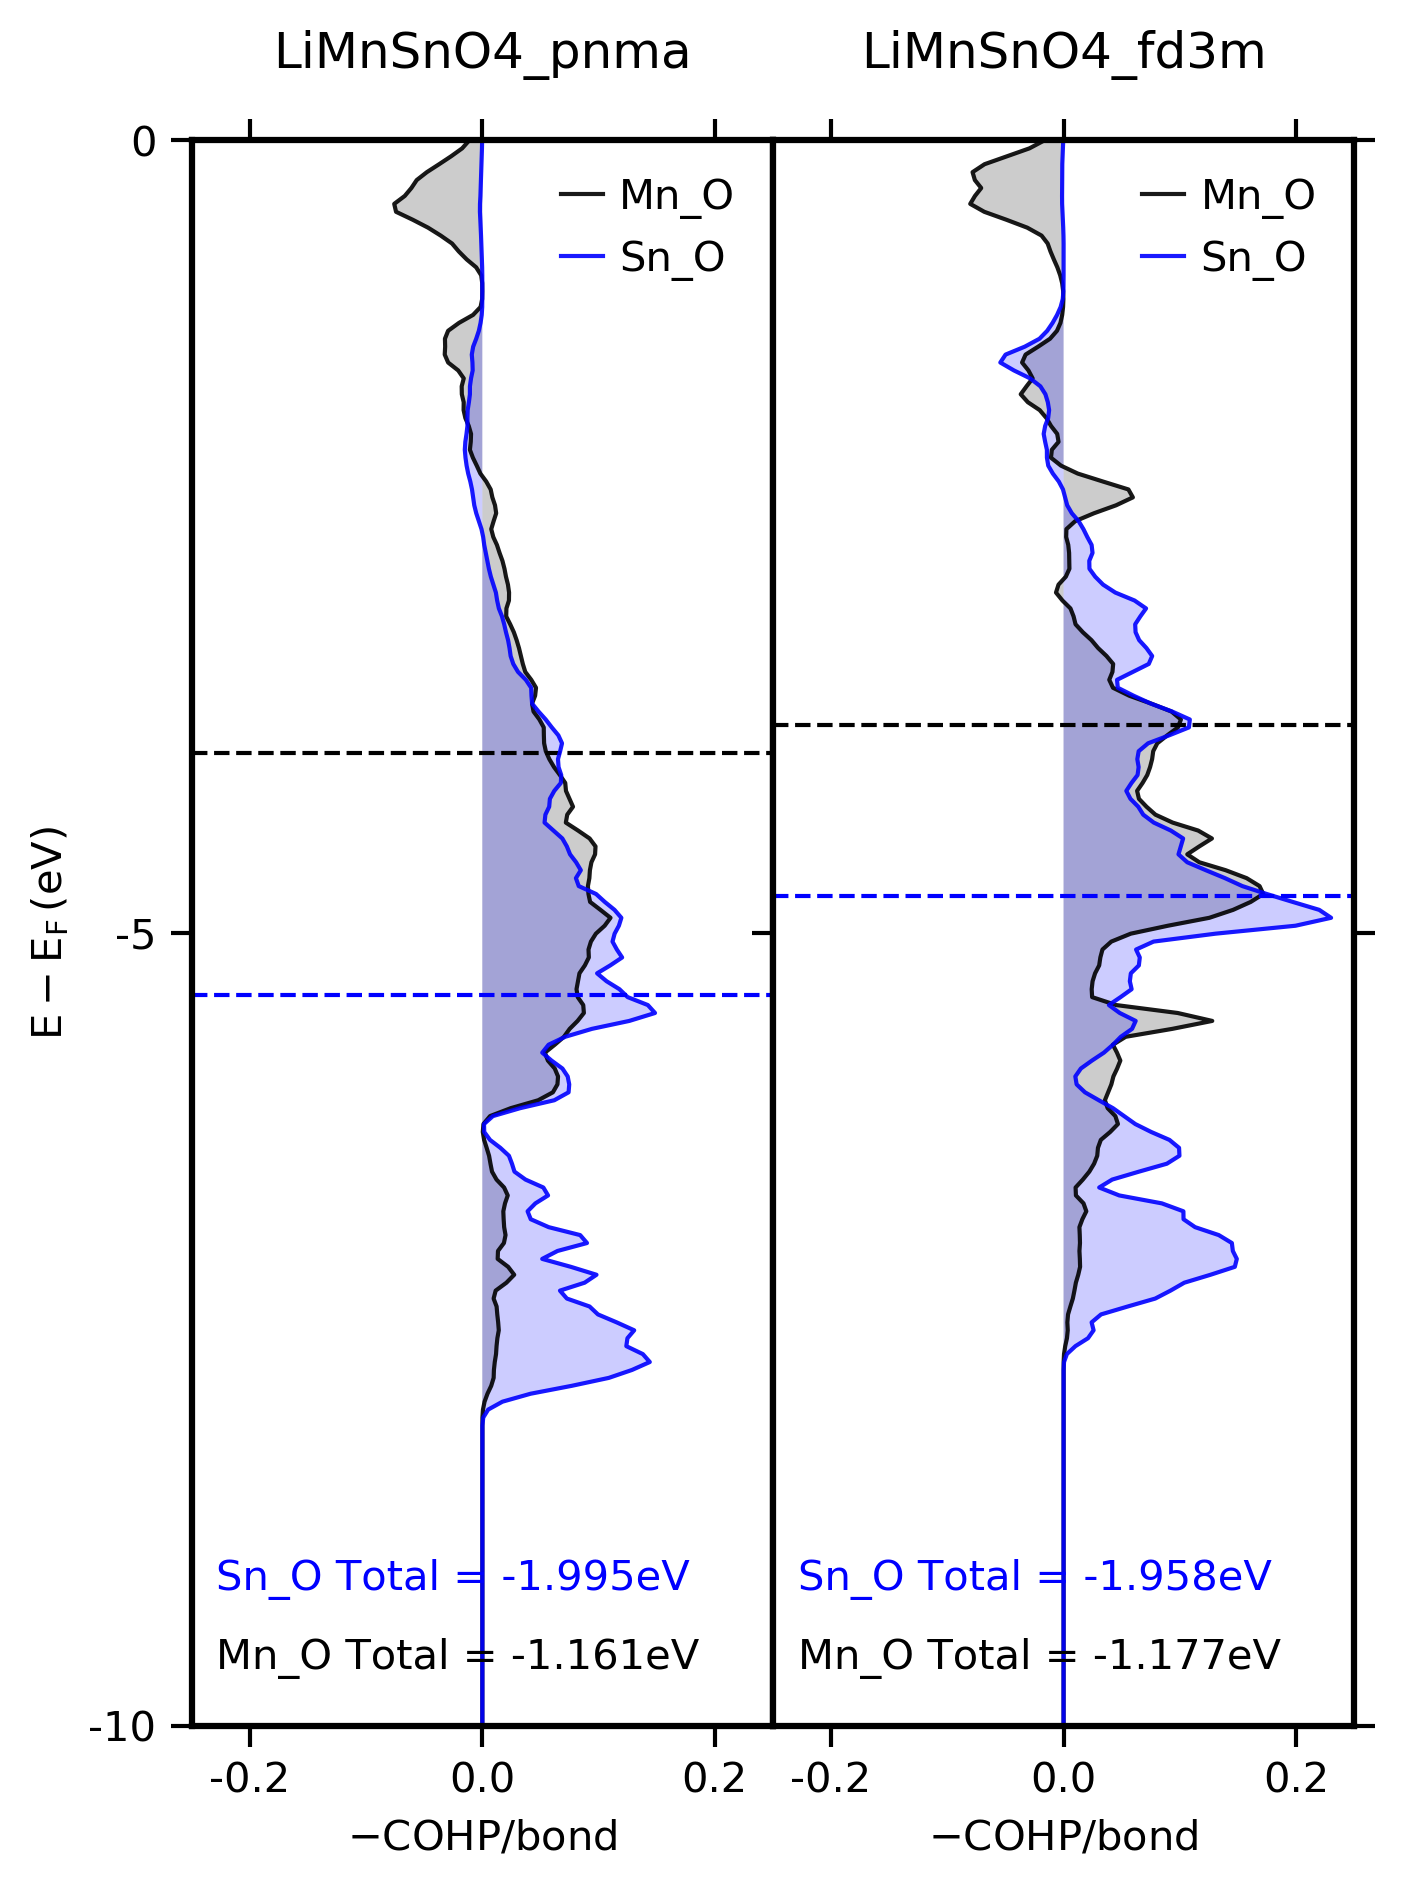

In [28]:
a.cohp(structure = 'LiMnSnO4', pairs_to_plot=['Mn_O', 'O_Sn'], colors_and_labels = {'Mn_O' : {'color' : 'black','label' : 'Mn_O'}, 'O_Sn' : {'color' : 'blue','label' : 'Sn_O'}}, xlim=(-0.25, 0.25), ylim=(-10, 0), xticks=(False, np.arange(-0.2, 0.21, 0.2)), yticks=(False, np.arange(-10, 0.1, 5)), show = True)

In [9]:
a = VASPInputHandler.VASPBasicAnalysis('/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-9166_first')

In [10]:
a.second_run(lobster=True, scan=True)

using GGA pots bc MP = TRUE


In [5]:
a = VASPInputHandler.VASPSetUp('/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-9166_first')

In [6]:
a.structure_from_id()

In [7]:
a.perturb_poscar(0.01)

'/global/cscratch1/sd/yychoi/JCESR/MgSCN/mp-9166_first/POSCAR'

In [8]:
a.kpoints(1000)
a.incar(geometry_opt=True, dos=True, MP=True, write_file=True)
a.potcar(MP=True, machine='cori')
a.copy_script(time='12:00:00')

In [5]:
import VASPHandyFunctions

In [6]:
data1 = VASPHandyFunctions.read_json('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/ehulldatafd3m_Na_Mg.json')
data2 = VASPHandyFunctions.read_json('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/ehulldatapnma_Na_Mg.json')

In [7]:
data = {}
for i in data1:
    data[i] = {}
    for j in data1[i]:
        data[i][j] = {}
        for k in data1[i][j]:
            data[i][j][k] = data1[i][j][k] - data2[i][j][k]

In [8]:
VASPHandyFunctions.write_json(data, '/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/ehulldatadiff_Na_Mg.json')

{'Na': {'CrSnO4': {'0.0': 94.73842604166549,
   '0.5': 67.98417442307691,
   '1.0': 7.787046428575195},
  'MnTiO4': {'0.0': 75.26136791666536,
   '0.5': 67.42847538461305,
   '1.0': 36.77584785714316},
  'Fe0.5Ti1.5O4': {'0.0': 89.12311249999937,
   '0.5': 92.09569538461615,
   '1.0': 26.62558500000145},
  'CrTiO4': {'0.0': 84.40065125000018,
   '0.5': 74.9680671153854,
   '1.0': 31.44355255951581},
  'MnSnO4': {'0.0': 53.62011166666747,
   '0.5': 52.17320076923215,
   '1.0': 3.3702091071416973}},
 'Mg': {'CrSnO4': {'0.0': 94.73842604166549,
   '0.5': 15.435887499998927,
   '1.0': -79.72175749999798},
  'MnTiO4': {'0.0': 75.26136791666536,
   '0.5': 10.084479807691338,
   '1.0': -66.88541125000214},
  'Fe0.5Ti1.5O4': {'0.0': 89.12311249999937,
   '0.5': 9.935347692307417,
   '1.0': -97.37836178571337},
  'CrTiO4': {'0.0': 84.40065125000018,
   '0.5': -14.685623076921672,
   '1.0': -94.28348196428615},
  'MnSnO4': {'0.0': 53.62011166666747,
   '0.5': 21.001130192307656,
   '1.0': -93.35